In [177]:
####Linear Regression to predict the Car Price######

In [178]:
# Supress warning and import the numpy and pandas packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
carprice = pd.read_csv("C:/Users/aishwarr/Documents/Upgrad/LR CAR PRICE/CarPrice_Assignment.csv")

In [180]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [181]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [182]:
carprice.shape

(205, 26)

In [183]:
carprice.describe

<bound method NDFrame.describe of      car_ID  symboling                       CarName fueltype aspiration  \
0         1          3            alfa-romero giulia      gas        std   
1         2          3           alfa-romero stelvio      gas        std   
2         3          1      alfa-romero Quadrifoglio      gas        std   
3         4          2                   audi 100 ls      gas        std   
4         5          2                    audi 100ls      gas        std   
5         6          2                      audi fox      gas        std   
6         7          1                    audi 100ls      gas        std   
7         8          1                     audi 5000      gas        std   
8         9          1                     audi 4000      gas      turbo   
9        10          0           audi 5000s (diesel)      gas      turbo   
10       11          2                      bmw 320i      gas        std   
11       12          0                      bmw 320i  

In [184]:
##Data Cleaning begins##

#Getting the Car Company names and renaming the column from CarNames to CarCompany
carprice['CarName']=carprice["CarName"].str.split(" ",n=1,expand=True)
carprice.rename(columns={'CarName': 'CarCompany'},inplace=True)

In [185]:
##Checking for null values
100*(carprice.isnull().sum()/len(carprice.index))

car_ID              0.0
symboling           0.0
CarCompany          0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [186]:
##From above output we could see that there are no null values. Checcking further for duplicates.
carprice.duplicated(keep='first').sum()

##No duplicates found

0

In [187]:
##From the dataset it was found that few car comapnies were spelled incorrect. Identifying them and correcting the spelings.
carcomp =carprice.groupby('CarCompany').groups
carcomp
carprice['CarCompany']=carprice[['CarCompany']].replace(['maxda','porcshce','vokswagen','vw','toyouta'],['mazda','porsche','volkswagen','volkswagen','toyota'])

##Data Cleaning ends##

##EDA

In [188]:
carprice.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [189]:
##Column Car_Id has serial numbers, hence drop the column
carprice.drop('car_ID', axis=1, inplace=True)

Text(0.5,1,'symbloing vs price boxplot')

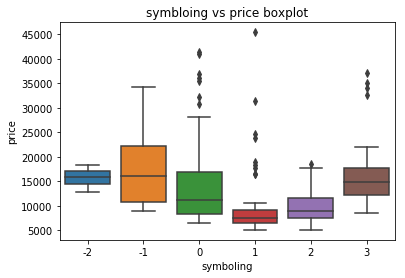

In [190]:
##Column Symboling##
##Categorical Variable##
##It is the insurance risk rating ranging from +3 to -3 with -3 being safe

sns.boxplot(x=carprice['symboling'],y=carprice['price']).set_title("symbloing vs price boxplot",fontsize=12)

> From the above boxplot it is identified that the 1st percentile - the lowest price drops from -3 to +1, drops from highest safety rating car to lowest safety car.

> There is increase in the lowest from for +2 and +3 as well.

> Outliers also found to be present


In [191]:
##Column Car Company##
##Categorical Variable##
##List the number of cars per company from the dataset
carprice["CarCompany"].value_counts()

toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Nissan          1
Name: CarCompany, dtype: int64

> From the above output we identify that Mercury and Nissan has only one car

> alfa-romero, jaguar, chevrolet, renault have less than 4 cars. 

> Also that, Toyota has the highest number of cars.

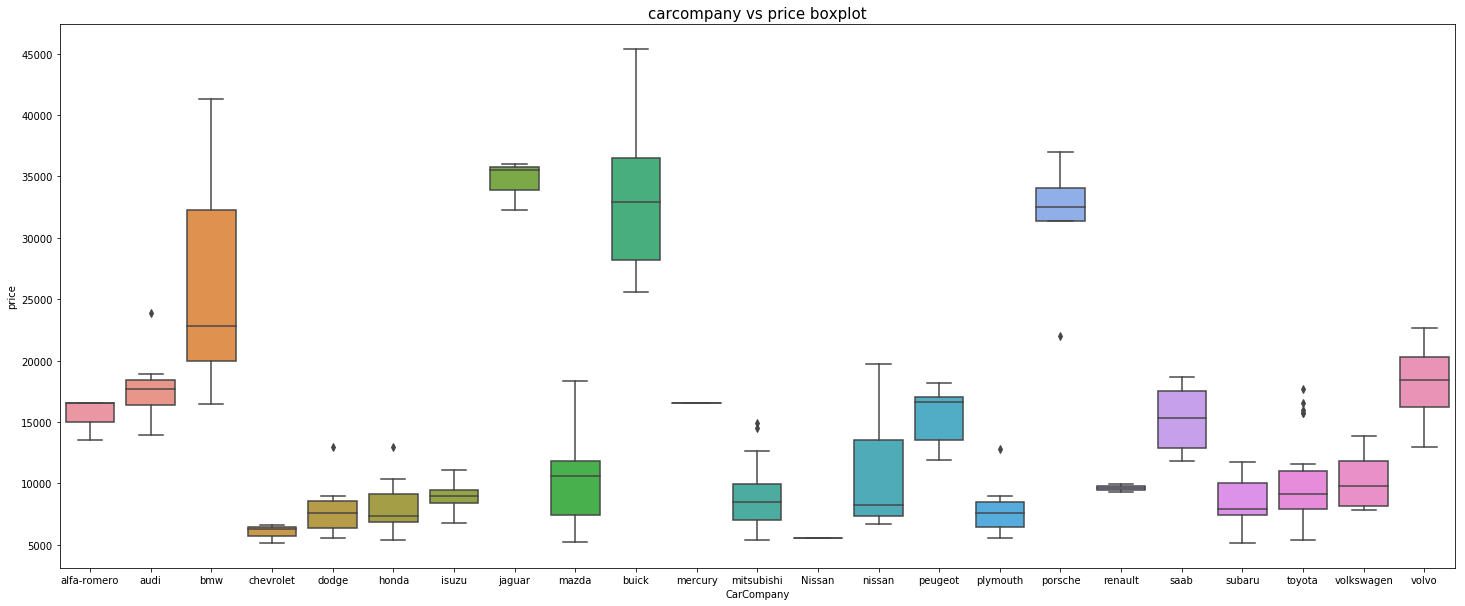

In [192]:
##Plot the car companies against the price
fig, ax =plt.subplots(1,1,figsize=(25,10))
sns.boxplot(x=carprice['CarCompany'],y=carprice['price']).set_title("carcompany vs price boxplot",fontsize=15)
fig.show()

> From the above plot we can identify that cheveorlet company have the lowest priced cars

> Cars of higher price range belong to buick, jaguar, bmw, porsche.

In [193]:
##Column Car's FuelType##
##Categorical Variable##
##List the number of cars per its fuel type from the dataset

carprice["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

There are more number of cars running on gasoline. And there are only 20 cars listed under diesel. 

Text(0.5,1,'fueltype vs price boxplot')

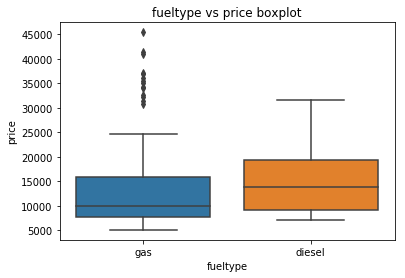

In [194]:
##Plot the car fueltype against the price
sns.boxplot(x=carprice['fueltype'],y=carprice['price']).set_title("fueltype vs price boxplot",fontsize=12)

Here we see that the median price of the gas vehicles are less than disel, however there seems to be outliers which indicates there are gasoline cars whihc has high price. 

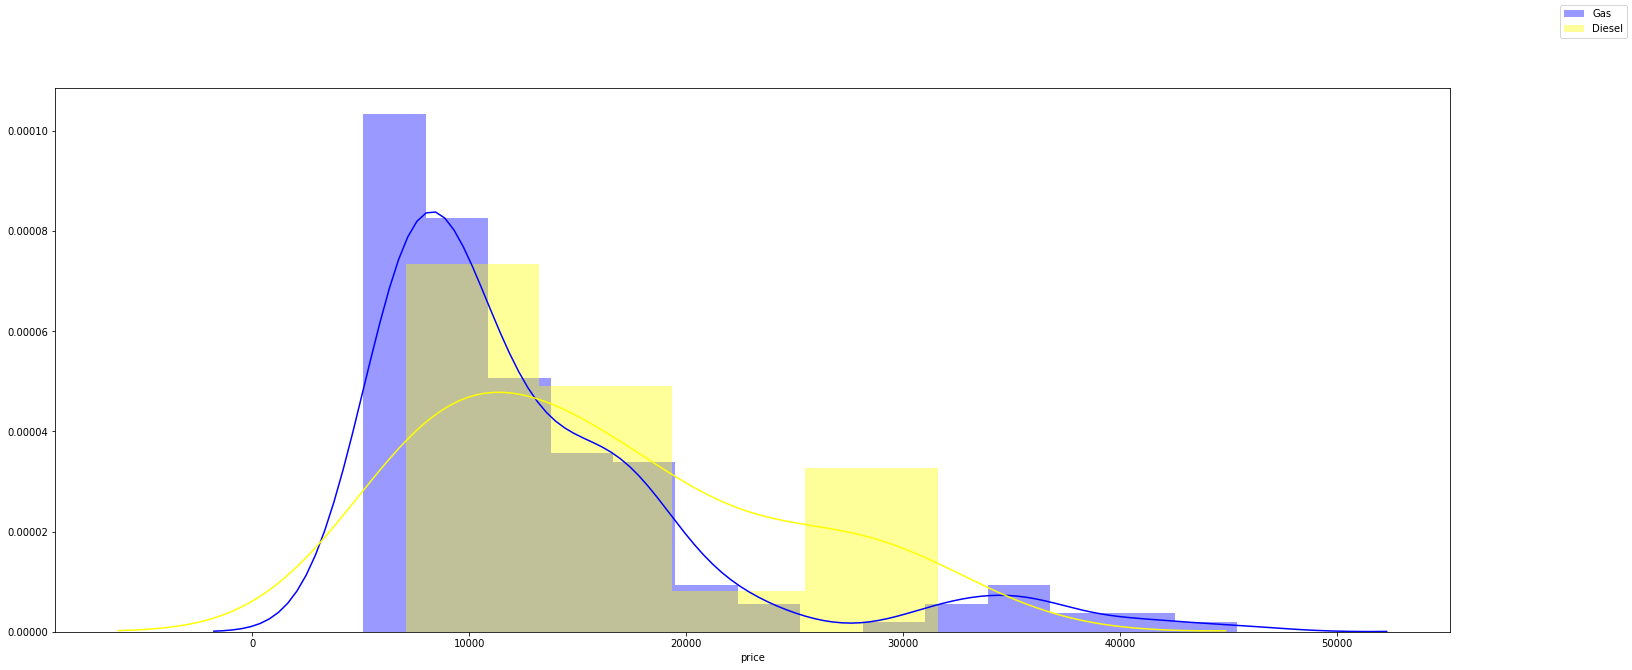

In [195]:
##Plot an histogram for further analysis


gas=carprice.loc[(carprice['fueltype']=="gas")]
diesel=carprice.loc[(carprice['fueltype']=="diesel")]
figure, ax =plt.subplots(1,1,figsize=(25,10))
sns.distplot( gas["price"],color="blue", label="Gas")
sns.distplot( diesel["price"] ,color="yellow", label="Diesel")
figure.legend()
figure.show()

> In the above histogram blue represents the Gasoline cars and yellow represenyts the Diesel cars

> We see there is a skew at the end for the gasoline cars towards higher price. This reconfirms the existence the outliers found in boxplot 

In [196]:
##Column Car's Aspiration##
##Categorical Variable##
##List the number of cars per its aspiration from the dataset

carprice["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

> Standard cars are more when compared to turbo cars.

Text(0.5,1,'aspiration vs price boxplot')

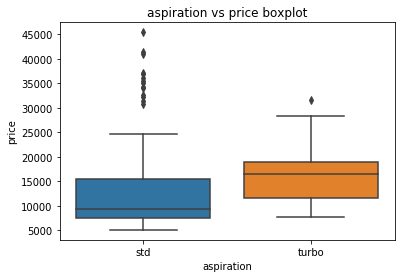

In [197]:
##Plot the car aspiration against the price
sns.boxplot(x=carprice['aspiration'],y=carprice['price']).set_title("aspiration vs price boxplot",fontsize=12)

> From the above plot we identify that the median price of the cars with turbo aspiration is higher than the 75th percentile of the cars with standard aspiration. 

> From this we can infer that a std car of higher price is still cheaper than the average priced turbo cars.

>Outliers is present standard aspiration cars.

In [198]:
##Column doornumber##
##Categorical Variable##
##List the number cars per the total number of doors in the car
carprice["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

> Cars with 4 doors are more than the one's with 2 doors

Text(0.5,1,'Doornumber vs price boxplot')

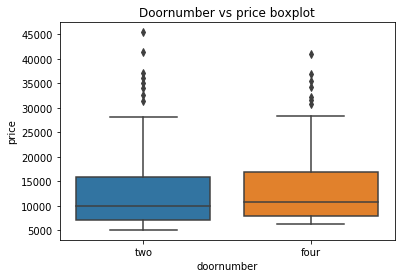

In [199]:
##Plot the number of doors in the car against the price
sns.boxplot(x=carprice['doornumber'],y=carprice['price']).set_title("Doornumber vs price boxplot",fontsize=12)

> From above we can state that they are almost equally priced regardless the number of doors

> Also, outliers present in both

> The cars of higher price belong to 2 door category.

In [200]:
##Column carbody##
##Categorical Variable##
##List the number cars per body type

carprice["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Text(0.5,1,'carbody vs price boxplot')

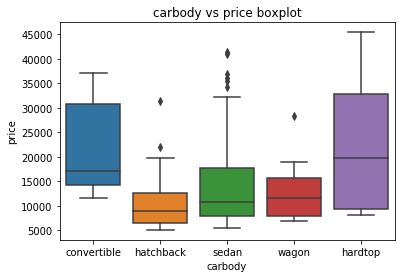

In [201]:
##Plot the carbody vs price.
sns.boxplot(x=carprice['carbody'],y=carprice['price']).set_title("carbody vs price boxplot",fontsize=12)

In [202]:
##Column drivewheel##
##Categorical Variable##
##List the number cars per drive wheels
carprice["drivewheel"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Text(0.5,1,'drivewheel vs price boxplot')

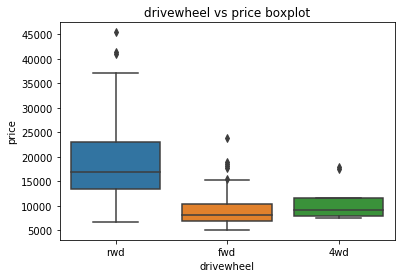

In [203]:
##Plot the drivewheel vs price.
sns.boxplot(x=carprice['drivewheel'],y=carprice['price']).set_title("drivewheel vs price boxplot",fontsize=12)

> Front wheel drive cars are the cheapest ones 

> Rear wheel drive cars are priced higher

In [204]:
##Column enginelocation##
##Categorical Variable##
##List the number cars per enginelocation
carprice["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

Text(0.5,1,'enginelocation vs price boxplot')

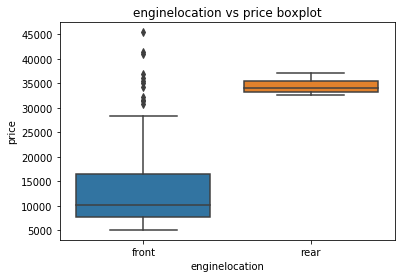

In [205]:
##Plot the enginelocation vs price.
sns.boxplot(x=carprice['enginelocation'],y=carprice['price']).set_title("enginelocation vs price boxplot",fontsize=12)

> Rear engine cars have highest median 

> We have outliers for front engine cars that indicates high priced cars

In [206]:
##Column wheelbase##

carprice['wheelbase'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

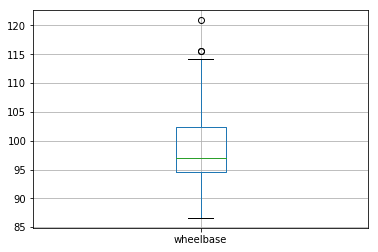

In [207]:
##Plot of wheelbase vs price.
carprice.boxplot(column=['wheelbase'])

In [208]:
#Code to get the 1 - 100th percentile for wheelbase
for i in np.arange(0,1.01,0.01):
    print(carprice['wheelbase'].quantile(i))    

86.6
88.408
88.672
89.5
91.3
93.02000000000001
93.1
93.1
93.428
93.7
93.7
93.7
93.7
93.7
93.7
93.7
93.7
93.7
94.13199999999999
94.5
94.5
94.5
94.5
94.5
94.5
94.5
94.5
94.5
94.5
95.13199999999999
95.3
95.396
95.7
95.7
95.7
95.7
95.7
95.7
95.9
95.9
95.96000000000001
96.1
96.3
96.3
96.3
96.5
96.5
96.5
96.5
96.888
97.0
97.0
97.2
97.2
97.21600000000001
97.3
97.3
97.3
98.4
98.4
98.4
98.576
98.8
98.8
98.96799999999999
99.1
99.1
99.168
99.47200000000001
99.8
100.4
100.4
100.4
101.2
101.2
102.4
102.4
102.424
102.9
103.3
103.5
103.69200000000001
104.3
104.29999999999998
104.372
104.66
105.29599999999999
105.8
107.32400000000001
107.9
107.9
107.964
109.1
109.1
109.78399999999999
110.0
112.84
114.056
114.2
115.544
120.9


> Since there is a significant jump from 99th percentile to the 100th percentile, we will consider only those values that is below 115.54

In [209]:
carprice=carprice[carprice.wheelbase !=120.9]

In [210]:
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [211]:
##Plot a scatterplot against price to see the trend.
sns.scatterplot(x=carprice['wheelbase'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

>We see here that the price is low at and around 95. It raises as the wheelbase increases.

In [212]:
##Column carlength##

carprice['carlength'].describe()

count    204.000000
mean     173.882353
std       12.133380
min      141.100000
25%      166.300000
50%      173.200000
75%      182.050000
max      202.600000
Name: carlength, dtype: float64

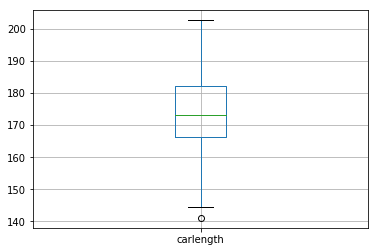

In [213]:
##plot of carlength vs price.
carprice.boxplot(column=['carlength'])

In [214]:

#Code to get 1 - 100th percentile for wheelbase
for i in np.arange(0,1.01,0.01):
    print(carprice['carlength'].quantile(i))    

141.1
144.762
150.0
155.9
156.01999999999998
157.13
157.3
157.3
157.3
157.3
157.3
157.3
157.3
158.212
158.7
158.935
159.1
160.88100000000003
164.426
165.3
165.3
165.489
166.096
166.3
166.3
166.3
166.8
167.3
167.5
168.7
168.7
168.8
168.9
168.9
169.0
169.005
169.7
169.75499999999997
170.26999999999998
170.7
171.29999999999998
171.7
171.7
171.7
172.0
172.0
172.152
172.4
172.488
173.0
173.2
173.2
173.312
173.459
173.562
174.25
174.872
175.284
175.4
175.6
175.6
175.683
176.2
176.2
176.2
176.6
176.8
176.8
177.32000000000002
177.8
177.8
177.85200000000003
178.416
180.2
180.56400000000002
182.04999999999998
183.5
184.6
186.6
186.6
186.6
186.7
186.7
186.7
187.11599999999999
187.8
188.8
188.8
188.8
188.8
188.8
188.946
190.44400000000005
191.532
192.7
193.635
198.672
198.89999999999998
199.182
199.6
202.6


>As there are not much outliers, no need to remove the outliers.

In [215]:
##Plot the scatterplot carlength vs price to see the trend.
sns.scatterplot(x=carprice['carlength'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

>The price increases with the length.

In [216]:
##Column carwidth##

carprice['carwidth'].describe()

count    204.000000
mean      65.879412
std        2.111514
min       60.300000
25%       64.075000
50%       65.500000
75%       66.675000
max       72.300000
Name: carwidth, dtype: float64

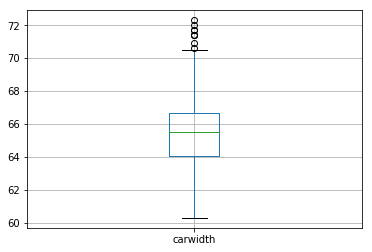

In [217]:
##plot of carwidth vs price.
carprice.boxplot(column=['carwidth'])

In [218]:
#Code to get  1 - 100th percentile for carwidth
for i in np.arange(0,1.01,0.01):
    print(carprice['carwidth'].quantile(i))    

60.3
62.527
63.6
63.6
63.6
63.6
63.60000000000001
63.642
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.8
63.857
63.9
64.0
64.0
64.0
64.0
64.07499999999999
64.178
64.2
64.2
64.37400000000001
64.4
64.4
64.4
64.4
64.6
64.8
64.8
65.0
65.028
65.2
65.2
65.2
65.4
65.4
65.4
65.4
65.4
65.4
65.4
65.447
65.5
65.5
65.5
65.559
65.6
65.6
65.668
65.7
65.922
66.1
66.28
66.3
66.3
66.38900000000001
66.5
66.5
66.5
66.5
66.5
66.5
66.5
66.5
66.5
66.5
66.5
66.675
66.9
66.9
67.2
67.2
67.2
67.7
67.9
67.9
67.952
68.3
68.4
68.4
68.4
68.4
68.4
68.873
68.9
69.45300000000002
70.17399999999999
70.3
70.588
71.355
71.4
71.7
72.3


In [219]:
##Plot the scatterplot  carwidth vs price to see the trend.
sns.scatterplot(x=carprice['carwidth'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

Again, the  price increses with the car width.

In [220]:
##Column carheight##

carprice['carheight'].describe()

count    204.000000
mean      53.710294
std        2.440573
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64

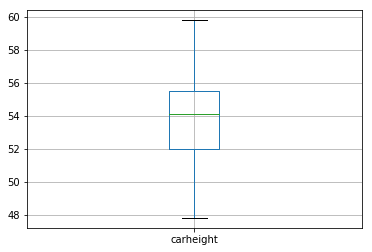

In [221]:
##plot of carheight vs price.
carprice.boxplot(column=['carheight'])

In [222]:
##Plot te scatterplot  carheight vs price to see the trend.
sns.scatterplot(x=carprice['carheight'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

> The price rises from 50 to 54, but it decreases at around 57

In [223]:
##Column curbweight##

carprice['curbweight'].describe()

count     204.000000
mean     2548.975490
std       513.318398
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2928.250000
max      4066.000000
Name: curbweight, dtype: float64

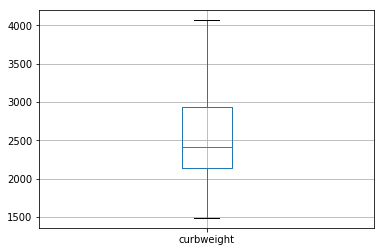

In [224]:
##plot of curbweight vs price.
carprice.boxplot(column=['curbweight'])

In [225]:
##Plot  scatterplot  carheight vs price to see the trend.
sns.scatterplot(x=carprice['curbweight'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

> Price increases with curbweight

In [226]:
##Column enginetype##


carprice["enginetype"].value_counts()

ohc      148
ohcf      15
dohc      12
ohcv      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

Text(0.5,1,'enginetype vs price boxplot')

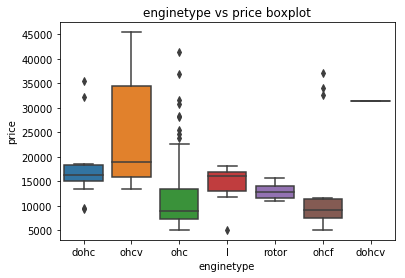

In [227]:
##plot of enginetype vs price.
sns.boxplot(x=carprice['enginetype'],y=carprice['price']).set_title("enginetype vs price boxplot",fontsize=12)

> More cars from engine type ohc and ohfc

In [228]:
	##Column cylindernumber##
	##Categorical Variable##

carprice["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       4
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

Text(0.5,1,'cylindernumber vs price boxplot')

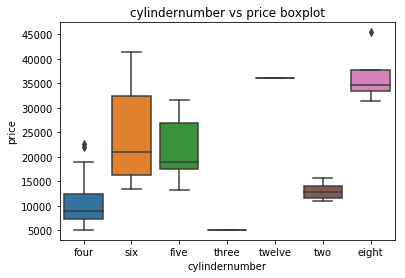

In [229]:
##plot of cylindernumber vs price.
sns.boxplot(x=carprice['cylindernumber'],y=carprice['price']).set_title("cylindernumber vs price boxplot",fontsize=12)

>Only one car for twelve and three engines.

>Most cars belong to six and four engines

In [230]:
	##Column enginesize##


carprice['enginesize'].describe()

count    204.000000
mean     126.019608
std       39.753175
min       61.000000
25%       97.000000
50%      119.500000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

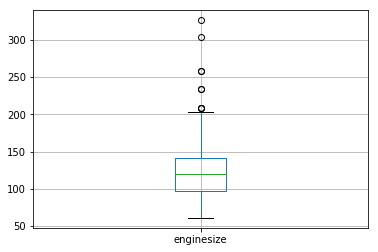

In [231]:
##plot of enginesize vs price.
carprice.boxplot(column=['enginesize'])

In [232]:
#Code to get the 1 - 100th percentile for enginesize
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['enginesize'].quantile(i))    

0.0 : 61.0
0.01 : 70.0
0.02 : 79.06
0.03 : 90.0
0.04 : 90.0
0.05 : 90.0
0.06 : 90.0
0.07 : 90.0
0.08 : 90.0
0.09 : 91.0
0.1 : 91.0
0.11 : 91.33
0.12 : 92.0
0.13 : 92.0
0.14 : 92.0
0.15 : 92.0
0.16 : 92.0
0.17 : 92.0
0.18 : 92.0
0.19 : 97.0
0.2 : 97.0
0.21 : 97.0
0.22 : 97.0
0.23 : 97.0
0.24 : 97.0
0.25 : 97.0
0.26 : 98.0
0.27 : 98.0
0.28 : 98.0
0.29 : 98.0
0.3 : 98.0
0.31 : 98.0
0.32 : 98.0
0.33 : 107.95000000000005
0.34 : 108.0
0.35000000000000003 : 108.0
0.36 : 108.0
0.37 : 108.0
0.38 : 108.0
0.39 : 108.17
0.4 : 109.0
0.41000000000000003 : 109.0
0.42 : 109.0
0.43 : 109.28999999999999
0.44 : 110.0
0.45 : 110.0
0.46 : 110.0
0.47000000000000003 : 110.0
0.48 : 110.0
0.49 : 110.47
0.5 : 119.5
0.51 : 120.0
0.52 : 120.0
0.53 : 120.0
0.54 : 121.0
0.55 : 121.0
0.56 : 121.0
0.5700000000000001 : 122.0
0.58 : 122.0
0.59 : 122.0
0.6 : 122.0
0.61 : 122.0
0.62 : 122.0
0.63 : 122.0
0.64 : 129.36000000000013
0.65 : 130.0
0.66 : 130.98000000000002
0.67 : 132.0
0.68 : 134.0
0.6900000000000001 : 136.0
0

>There is spikes from 2 to 3, 49 to 50 and 98 to 99 percentile. 

> No extreme outliers so no remediation required

In [233]:
##Plot the scatterplot  enginesize vs price to see the trend.
sns.scatterplot(x=carprice['enginesize'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [234]:
##Column fuelsystem##
##Categorical Variable##
carprice["fuelsystem"].value_counts()

mpfi    93
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

Text(0.5,1,'fuelsystem vs price boxplot')

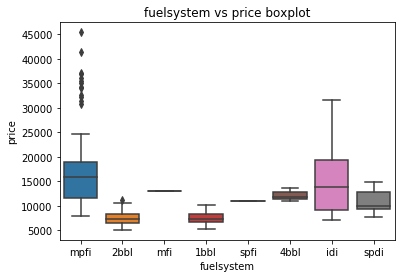

In [235]:
##plot of fuelsystem vs price.
sns.boxplot(x=carprice['fuelsystem'],y=carprice['price']).set_title("fuelsystem vs price boxplot",fontsize=12)

>Seen that fuelsystem MPFi shows highest median value

>Also outliers present

In [236]:
##Column boreratio##

carprice['boreratio'].describe()

count    204.000000
mean       3.327451
std        0.269487
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64

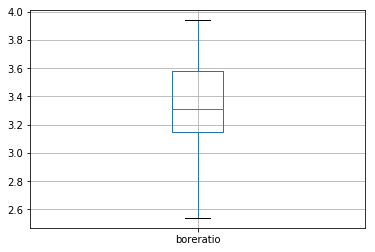

In [237]:
##plot of boreratio vs price.
carprice.boxplot(column=['boreratio'])

In [238]:
##Plot  scatterplot of boreratio vs price to see the trend.
sns.scatterplot(x=carprice['boreratio'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

>The price increases as and when boreprice increases. 

In [239]:
##Column stroke##
carprice['stroke'].describe()

count    204.000000
mean       3.254951
std        0.314298
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

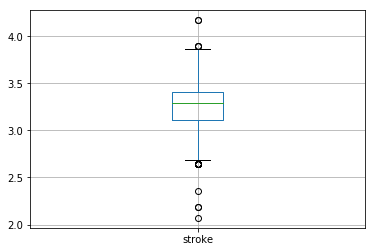

In [240]:
##plot of stroke vs price.
carprice.boxplot(column=['stroke'])

In [241]:
#Code to get the 1 - 100th percentile for stroke
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['stroke'].quantile(i))    

0.0 : 2.07
0.01 : 2.1951
0.02 : 2.64
0.03 : 2.64
0.04 : 2.6399999999999997
0.05 : 2.64
0.06 : 2.64
0.07 : 2.6484
0.08 : 2.6992000000000003
0.09 : 2.8
0.1 : 2.879
0.11 : 2.9
0.12 : 3.03
0.13 : 3.03
0.14 : 3.03
0.15 : 3.03
0.16 : 3.03
0.17 : 3.03
0.18 : 3.03
0.19 : 3.07
0.2 : 3.07
0.21 : 3.07
0.22 : 3.08
0.23 : 3.1
0.24 : 3.11
0.25 : 3.11
0.26 : 3.11
0.27 : 3.1443
0.28 : 3.15
0.29 : 3.15
0.3 : 3.15
0.31 : 3.15
0.32 : 3.15
0.33 : 3.15
0.34 : 3.1606000000000005
0.35000000000000003 : 3.19
0.36 : 3.19
0.37 : 3.1922
0.38 : 3.23
0.39 : 3.23
0.4 : 3.23
0.41000000000000003 : 3.23
0.42 : 3.23
0.43 : 3.23
0.44 : 3.23
0.45 : 3.255
0.46 : 3.255
0.47000000000000003 : 3.27
0.48 : 3.27
0.49 : 3.27
0.5 : 3.29
0.51 : 3.29
0.52 : 3.29
0.53 : 3.29
0.54 : 3.3272000000000004
0.55 : 3.3500000000000005
0.56 : 3.3500000000000005
0.5700000000000001 : 3.3500000000000005
0.58 : 3.3796
0.59 : 3.39
0.6 : 3.39
0.61 : 3.3900000000000006
0.62 : 3.39
0.63 : 3.39
0.64 : 3.39
0.65 : 3.4
0.66 : 3.4
0.67 : 3.4
0.68 : 3.4
0.

In [242]:
carprice=carprice[carprice.stroke > 2.64]
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [243]:
##Plot the scatterplot  stroke vs price to see the trend.
sns.scatterplot(x=carprice['stroke'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

> Spikes seen but overall price increases with stroke

In [244]:
##Column compressionratio##

carprice['compressionratio'].describe()

count    189.000000
mean      10.260952
std        4.112613
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

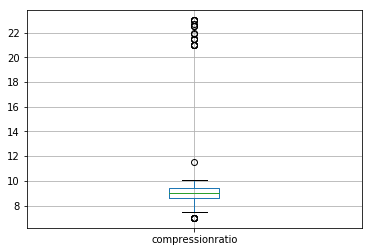

In [245]:
##plot of compressionratio vs price.
carprice.boxplot(column=['compressionratio'])

In [246]:
#Code to get the 1 - 100th percentile for compressionratio
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['compressionratio'].quantile(i))    

0.0 : 7.0
0.01 : 7.0
0.02 : 7.0
0.03 : 7.0
0.04 : 7.5
0.05 : 7.5
0.06 : 7.5280000000000005
0.07 : 7.6
0.08 : 7.608
0.09 : 7.984
0.1 : 8.0
0.11 : 8.0
0.12 : 8.0
0.13 : 8.1
0.14 : 8.3
0.15 : 8.32
0.16 : 8.4
0.17 : 8.496
0.18 : 8.5
0.19 : 8.5
0.2 : 8.5
0.21 : 8.5
0.22 : 8.5
0.23 : 8.5
0.24 : 8.512
0.25 : 8.6
0.26 : 8.6
0.27 : 8.676
0.28 : 8.7
0.29 : 8.7
0.3 : 8.7
0.31 : 8.8
0.32 : 8.832
0.33 : 9.0
0.34 : 9.0
0.35000000000000003 : 9.0
0.36 : 9.0
0.37 : 9.0
0.38 : 9.0
0.39 : 9.0
0.4 : 9.0
0.41000000000000003 : 9.0
0.42 : 9.0
0.43 : 9.0
0.44 : 9.0
0.45 : 9.0
0.46 : 9.0
0.47000000000000003 : 9.0
0.48 : 9.0
0.49 : 9.0
0.5 : 9.0
0.51 : 9.0
0.52 : 9.0
0.53 : 9.0
0.54 : 9.152000000000001
0.55 : 9.2
0.56 : 9.2
0.5700000000000001 : 9.2
0.58 : 9.203999999999997
0.59 : 9.3
0.6 : 9.3
0.61 : 9.3
0.62 : 9.3
0.63 : 9.3
0.64 : 9.3388
0.65 : 9.4
0.66 : 9.4
0.67 : 9.4
0.68 : 9.4
0.6900000000000001 : 9.4
0.7000000000000001 : 9.4
0.71 : 9.4
0.72 : 9.4
0.73 : 9.4
0.74 : 9.4
0.75 : 9.4
0.76 : 9.4
0.77 : 9.4
0.7

In [247]:
carprice=carprice[carprice.compressionratio <10.54]
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [248]:
##Plot  scatterplot  compressionratio vs price to see the trend.
sns.scatterplot(x=carprice['compressionratio'], y=lr_autoprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

>the price ranges between 8.5 to 9

In [249]:
##Column horsepower

carprice['horsepower'].describe()

count    168.000000
mean     106.392857
std       39.470300
min       48.000000
25%       70.000000
50%       98.500000
75%      121.000000
max      288.000000
Name: horsepower, dtype: float64

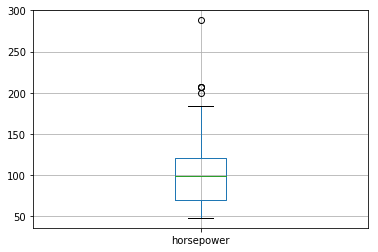

In [250]:
##plot of horsepower vs price.
carprice.boxplot(column=['horsepower'])

In [251]:
#Code to get the 1 - 100th percentile for horsepower
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['horsepower'].quantile(i))    

0.0 : 48.0
0.01 : 59.34
0.02 : 62.0
0.03 : 62.0
0.04 : 62.0
0.05 : 64.1
0.06 : 68.0
0.07 : 68.0
0.08 : 68.0
0.09 : 68.0
0.1 : 68.0
0.11 : 68.0
0.12 : 68.0
0.13 : 68.0
0.14 : 68.0
0.15 : 68.05
0.16 : 69.0
0.17 : 69.0
0.18 : 69.0
0.19 : 69.0
0.2 : 69.0
0.21 : 70.0
0.22 : 70.0
0.23 : 70.0
0.24 : 70.0
0.25 : 70.0
0.26 : 70.0
0.27 : 70.54000000000002
0.28 : 76.0
0.29 : 76.0
0.3 : 76.2
0.31 : 82.62000000000002
0.32 : 84.0
0.33 : 84.0
0.34 : 84.78
0.35000000000000003 : 85.0
0.36 : 86.0
0.37 : 86.0
0.38 : 86.92
0.39 : 88.0
0.4 : 88.0
0.41000000000000003 : 88.0
0.42 : 90.0
0.43 : 90.0
0.44 : 90.0
0.45 : 92.0
0.46 : 92.0
0.47000000000000003 : 94.44999999999997
0.48 : 97.0
0.49 : 97.0
0.5 : 98.5
0.51 : 100.17
0.52 : 101.0
0.53 : 101.0
0.54 : 101.0
0.55 : 101.85000000000001
0.56 : 102.0
0.5700000000000001 : 102.0
0.58 : 108.88
0.59 : 110.0
0.6 : 110.0
0.61 : 110.0
0.62 : 110.54
0.63 : 111.21
0.64 : 112.0
0.65 : 114.0
0.66 : 114.0
0.67 : 114.0
0.68 : 114.56
0.6900000000000001 : 116.0
0.700000000000

> Rise from 97 percentile to 98 percentile identified
> Capping values at 184 to remove outliers

In [252]:
carprice=carprice[carprice.horsepower <184]
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [253]:
##Plot the scatterplot horsepower vs price to see the trend.
sns.scatterplot(x=carprice['horsepower'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [254]:
##Column peakrpm

carprice['peakrpm'].describe()

count     162.000000
mean     5226.851852
std       422.986237
min      4200.000000
25%      5000.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64

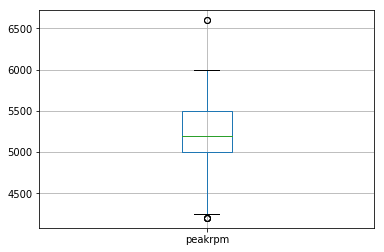

In [255]:
##plot of peakrpm vs price.
carprice.boxplot(column=['peakrpm'])

In [256]:
#Code to print the 1 - 100th percentile for peakrpm
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['peakrpm'].quantile(i))    

0.0 : 4200.0
0.01 : 4200.0
0.02 : 4211.0
0.03 : 4250.0
0.04 : 4470.0
0.05 : 4750.0
0.06 : 4750.0
0.07 : 4800.0
0.08 : 4800.0
0.09 : 4800.0
0.1 : 4800.0
0.11 : 4800.0
0.12 : 4800.0
0.13 : 4800.0
0.14 : 4800.0
0.15 : 4800.0
0.16 : 4800.0
0.17 : 4800.0
0.18 : 4800.0
0.19 : 4800.0
0.2 : 4800.0
0.21 : 4800.0
0.22 : 4800.0
0.23 : 5000.0
0.24 : 5000.0
0.25 : 5000.0
0.26 : 5000.0
0.27 : 5000.0
0.28 : 5000.0
0.29 : 5000.0
0.3 : 5000.0
0.31 : 5000.0
0.32 : 5000.0
0.33 : 5000.0
0.34 : 5000.0
0.35000000000000003 : 5000.0
0.36 : 5000.0
0.37 : 5000.0
0.38 : 5100.0
0.39 : 5100.0
0.4 : 5100.0
0.41000000000000003 : 5200.0
0.42 : 5200.0
0.43 : 5200.0
0.44 : 5200.0
0.45 : 5200.0
0.46 : 5200.0
0.47000000000000003 : 5200.0
0.48 : 5200.0
0.49 : 5200.0
0.5 : 5200.0
0.51 : 5200.0
0.52 : 5200.0
0.53 : 5216.5
0.54 : 5250.0
0.55 : 5250.0
0.56 : 5250.0
0.5700000000000001 : 5288.5
0.58 : 5400.0
0.59 : 5400.0
0.6 : 5400.0
0.61 : 5400.0
0.62 : 5400.0
0.63 : 5400.0
0.64 : 5400.0
0.65 : 5400.0
0.66 : 5500.0
0.67 : 550

> Values above 5800 are outliers hence capping values above 6000

In [257]:
carprice=carprice[carprice.peakrpm <6000]
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [258]:
##Plot  scatterplot  peakrpm vs price to see the trend.
sns.scatterplot(x=carprice['peakrpm'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [259]:
#Column citympg

carprice['citympg'].describe()

count    151.000000
mean      25.119205
std        6.338167
min       15.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

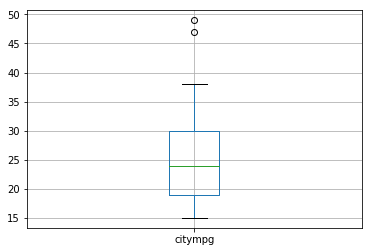

In [260]:
##plot of citympg vs price.
carprice.boxplot(column=['citympg'])

In [261]:
#Code to get 1 - 100th percentile for citympg
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['citympg'].quantile(i))

0.0 : 15.0
0.01 : 15.0
0.02 : 16.0
0.03 : 16.0
0.04 : 16.0
0.05 : 16.5
0.06 : 17.0
0.07 : 17.0
0.08 : 17.0
0.09 : 18.0
0.1 : 18.0
0.11 : 19.0
0.12 : 19.0
0.13 : 19.0
0.14 : 19.0
0.15 : 19.0
0.16 : 19.0
0.17 : 19.0
0.18 : 19.0
0.19 : 19.0
0.2 : 19.0
0.21 : 19.0
0.22 : 19.0
0.23 : 19.0
0.24 : 19.0
0.25 : 19.0
0.26 : 19.0
0.27 : 19.5
0.28 : 20.0
0.29 : 20.5
0.3 : 21.0
0.31 : 21.0
0.32 : 21.0
0.33 : 21.0
0.34 : 23.0
0.35000000000000003 : 23.0
0.36 : 23.0
0.37 : 23.0
0.38 : 23.0
0.39 : 23.0
0.4 : 23.0
0.41000000000000003 : 24.0
0.42 : 24.0
0.43 : 24.0
0.44 : 24.0
0.45 : 24.0
0.46 : 24.0
0.47000000000000003 : 24.0
0.48 : 24.0
0.49 : 24.0
0.5 : 24.0
0.51 : 24.0
0.52 : 24.0
0.53 : 24.0
0.54 : 25.0
0.55 : 25.0
0.56 : 25.0
0.5700000000000001 : 25.500000000000014
0.58 : 26.0
0.59 : 26.0
0.6 : 26.0
0.61 : 26.5
0.62 : 27.0
0.63 : 27.0
0.64 : 27.0
0.65 : 27.0
0.66 : 27.0
0.67 : 27.0
0.68 : 27.0
0.6900000000000001 : 27.0
0.7000000000000001 : 27.0
0.71 : 28.0
0.72 : 29.0
0.73 : 29.0
0.74 : 30.0
0.75 :

>From plot we see spike at higher price
> also we see spike between 98% to 99%. 
> We can set cutoff to 38

In [262]:
carprice=carprice[lr_autoprice.citympg <39]
carprice.head()

NameError: name 'lr_autoprice' is not defined

In [263]:
##Plot  scatterplot  citympg vs price to see the trend.
sns.scatterplot(x=carprice['citympg'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [264]:
##Column highwaympg

carprice['highwaympg'].describe()

count    151.000000
mean      30.894040
std        6.599144
min       18.000000
25%       25.000000
50%       30.000000
75%       37.000000
max       54.000000
Name: highwaympg, dtype: float64

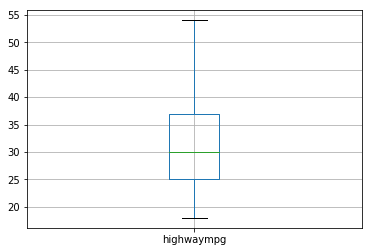

In [265]:
##plot of highwaympg vs price.
carprice.boxplot(column=['highwaympg'])

In [266]:
#Code to get  1 - 100th percentile for highwaympg
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['highwaympg'].quantile(i))

0.0 : 18.0
0.01 : 18.5
0.02 : 19.0
0.03 : 20.0
0.04 : 22.0
0.05 : 22.0
0.06 : 22.0
0.07 : 22.0
0.08 : 22.0
0.09 : 22.5
0.1 : 24.0
0.11 : 24.0
0.12 : 24.0
0.13 : 24.0
0.14 : 24.0
0.15 : 24.0
0.16 : 24.0
0.17 : 24.0
0.18 : 24.0
0.19 : 24.0
0.2 : 25.0
0.21 : 25.0
0.22 : 25.0
0.23 : 25.0
0.24 : 25.0
0.25 : 25.0
0.26 : 26.0
0.27 : 26.0
0.28 : 27.0
0.29 : 27.0
0.3 : 27.0
0.31 : 28.0
0.32 : 28.0
0.33 : 28.0
0.34 : 28.0
0.35000000000000003 : 28.0
0.36 : 28.0
0.37 : 28.0
0.38 : 29.0
0.39 : 29.0
0.4 : 29.0
0.41000000000000003 : 29.0
0.42 : 30.0
0.43 : 30.0
0.44 : 30.0
0.45 : 30.0
0.46 : 30.0
0.47000000000000003 : 30.0
0.48 : 30.0
0.49 : 30.0
0.5 : 30.0
0.51 : 30.0
0.52 : 30.0
0.53 : 31.0
0.54 : 31.0
0.55 : 31.0
0.56 : 32.0
0.5700000000000001 : 32.0
0.58 : 32.0
0.59 : 32.0
0.6 : 32.0
0.61 : 32.0
0.62 : 32.0
0.63 : 32.0
0.64 : 32.0
0.65 : 32.5
0.66 : 33.0
0.67 : 33.0
0.68 : 34.0
0.6900000000000001 : 34.0
0.7000000000000001 : 34.0
0.71 : 34.0
0.72 : 34.0
0.73 : 34.0
0.74 : 34.0
0.75 : 37.0
0.76 : 3

>We see a high spike from 99-100 percentile. We will set the cap at 46

In [267]:
carprice=carprice[carprice.highwaympg <46]
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [268]:
##Plot  scatterplot  highwaympg vs price to see the trend.
sns.scatterplot(x=carprice['highwaympg'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

>Similar trending like previous

> highwaympg also increses with price

In [269]:
##Column price

carprice['price'].describe()

count      148.000000
mean     12518.393020
std       6849.627265
min       5195.000000
25%       7897.250000
50%       9992.000000
75%      16106.000000
max      41315.000000
Name: price, dtype: float64

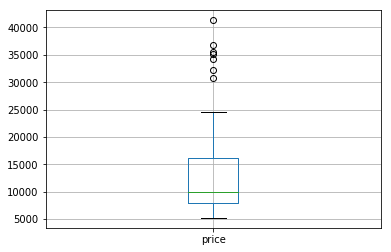

In [270]:
##plot of price
carprice.boxplot(column=['price'])

In [271]:
#Code to get  1 - 100th percentile for price
for i in np.arange(0,1.01,0.01):
    print(i,":",carprice['price'].quantile(i))

0.0 : 5195.0
0.01 : 5367.27
0.02 : 5398.4
0.03 : 5528.93
0.04 : 5572.0
0.05 : 6127.9
0.06 : 6221.799999999999
0.07 : 6248.14
0.08 : 6327.679999999999
0.09 : 6402.530000000001
0.1 : 6548.900000000001
0.11 : 6652.4
0.12 : 6683.719999999999
0.13 : 6692.33
0.14 : 6747.200000000001
0.15 : 6797.700000000001
0.16 : 6884.879999999999
0.17 : 6937.8
0.18 : 7085.139999999999
0.19 : 7291.93
0.2 : 7367.4
0.21 : 7485.48
0.22 : 7609.0
0.23 : 7673.8
0.24 : 7825.880000000001
0.25 : 7897.25
0.26 : 7957.0
0.27 : 7969.42
0.28 : 8008.4400000000005
0.29 : 8140.529999999999
0.3 : 8199.3
0.31 : 8244.27
0.32 : 8361.640000000001
0.33 : 8472.46
0.34 : 8495.0
0.35000000000000003 : 8525.55
0.36 : 8760.4
0.37 : 8845.0
0.38 : 8906.49
0.39 : 8917.985
0.4 : 8921.0
0.41000000000000003 : 8948.27
0.42 : 9057.039999999999
0.43 : 9262.41
0.44 : 9279.0
0.45 : 9333.100000000002
0.46 : 9604.800000000001
0.47000000000000003 : 9900.759999999998
0.48 : 9970.76
0.49 : 9988.029999999999
0.5 : 9992.0
0.51 : 10237.5
0.52 : 10317.0
0

>Identified spike from 99-100 percentile, 

>Capping at 36254.9

In [272]:
carprice=carprice[carprice.price <36255]
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA ends

Begin derived metrics

In [273]:
##Columns fueltype, aspiration, doornumber, enginelocation
varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation']

# Create a binary map function
def binary_map(x):
    return x.map({'diesel': 1,'std': 1,'two': 1,'front': 1, "gas": 0, "turbo": 0, "four": 0, "rear": 0})

# Apply the function to the dataframe
carprice[varlist] = carprice[varlist].apply(binary_map)

In [274]:
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [275]:
##Convert the carbody to factor. 
## 5 levels present so create 4 dummy variables
status = pd.get_dummies(carprice['carbody'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,8.0,115,5500,18,22,17450.0,0,0,1,0


In [276]:
####Convert the drivewheel to factor. 
## 3 levels present so create 2 dummy variables
status = pd.get_dummies(carprice['drivewheel'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,5000,21,27,13495.0,0,0,0,0,0,1
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,5000,21,27,16500.0,0,0,0,0,0,1
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,5000,19,26,16500.0,0,1,0,0,0,1
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,5500,24,30,13950.0,0,0,1,0,1,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,5500,18,22,17450.0,0,0,1,0,0,0


In [277]:
####Convert the symboling to factor. 
## 5 levels present so create 4 dummy variables
status = pd.get_dummies(carprice['symboling'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,hatchback,sedan,wagon,fwd,rwd,-1,0,1,2,3
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,1,0,0,0,0,1
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,1,0,0,0,0,1
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,1,0,0,0,1,0,0,1,0,0
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,0,1,0,1,0,0,0,0,1,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,0,1,0,0,0,0,0,0,1,0


In [278]:
####Convert the CarCompany to factor. 
## 22 levels present so create 21 dummy variables
status = pd.get_dummies(carprice['CarCompany'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,toyota,volkswagen,volvo
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [279]:
####Convert the enginetype to factor. 
## 7 levels present so create 6 dummy variables
status = pd.get_dummies(carprice['enginetype'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,plymouth,porsche,renault,saab,toyota,volkswagen,volvo,l,ohc,ohcv
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,0,0,1
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,0,1,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,0,1,0


In [280]:
####Convert the cylindernumber to factor. 
## 7 levels present so create 6 dummy variables
status = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,saab,toyota,volkswagen,volvo,l,ohc,ohcv,five,four,six
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,1,0
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,1,0
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,1,0,0,1
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,1,0,0,1,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,1,0,1,0,0


In [281]:
####Convert the fuelsystem to factor. 
## 8 levels present so create 7 dummy variables
status = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
carprice = pd.concat([carprice, status], axis = 1)
carprice.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,ohc,ohcv,five,four,six,2bbl,mfi,mpfi,spdi,spfi
0,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,1,0,0
1,3,alfa-romero,0,1,1,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,1,0,0
2,1,alfa-romero,0,1,1,hatchback,rwd,1,94.5,171.2,...,0,1,0,0,1,0,0,1,0,0
3,2,audi,0,1,0,sedan,fwd,1,99.8,176.6,...,1,0,0,1,0,0,0,1,0,0
4,2,audi,0,1,0,sedan,4wd,1,99.4,176.6,...,1,0,1,0,0,0,0,1,0,0


In [282]:
##Using Hp to curb weight ratio and get the power to weight ratio
carprice['powertoweight'] = round(carprice.horsepower / carprice.curbweight,2)

In [283]:
##Drop the columns for which new ones were created
#Columns being, carbody,drivewheel, symboling, CarComp,enginetype,cylindernumber,fuelsystem
carprice.drop(['carbody','drivewheel','symboling','CarCompany','enginetype','cylindernumber','fuelsystem'], axis = 1, inplace = True)

Derived metrics end

In [284]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
carprice_train, carprice_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

>We have now fetched the data between the train and the test set

> Apply min max scaling to all those columns that are not binary or derived.

In [285]:
from sklearn.preprocessing import MinMaxScaler

In [286]:
scaler = MinMaxScaler()

In [287]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','powertoweight']
carprice_train[num_vars] = scaler.fit_transform(carprice_train[num_vars])

In [288]:
carprice_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,ohcv,five,four,six,2bbl,mfi,mpfi,spdi,spfi,powertoweight
199,0,0,0,1,0.613281,0.782258,0.562500,0.844660,0.592194,0.284916,...,0,0,1,0,0,0,1,0,0,0.75
109,0,1,0,1,1.000000,0.985887,0.687500,0.961165,0.624944,0.229050,...,0,0,1,0,0,0,1,0,0,0.25
185,0,1,0,1,0.339844,0.437500,0.385417,0.669903,0.168237,0.167598,...,0,0,1,0,0,0,1,0,0,0.50
154,0,1,0,1,0.277344,0.397177,0.187500,1.000000,0.203230,0.072626,...,0,0,1,0,1,0,0,0,0,0.25
167,0,1,1,1,0.382812,0.528226,0.395833,0.310680,0.315388,0.374302,...,0,0,1,0,0,0,1,0,0,0.75


In [289]:
carprice_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,ohcv,five,four,six,2bbl,mfi,mpfi,spdi,spfi,powertoweight
count,102.0,102.000000,102.000000,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.000000,102.000000,102.0,102.000000
mean,0.0,0.862745,0.431373,1.0,0.382851,0.486302,0.406454,0.462974,0.312270,0.261967,...,0.068627,0.049020,0.803922,0.137255,0.372549,0.0,0.529412,0.068627,0.0,0.502451
std,0.0,0.345816,0.497714,0.0,0.200468,0.217894,0.196825,0.231817,0.215781,0.189680,...,0.254068,0.216975,0.398989,0.345816,0.485871,0.0,0.501599,0.254068,0.0,0.194272
min,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.0,1.000000,0.000000,1.0,0.230469,0.341230,0.229167,0.271845,0.140870,0.106145,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.312500
50%,0.0,1.000000,0.000000,1.0,0.308594,0.469758,0.390625,0.514563,0.257963,0.240223,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.500000
75%,0.0,1.000000,1.000000,1.0,0.492188,0.610383,0.489583,0.611650,0.485307,0.346369,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.687500
max,0.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000


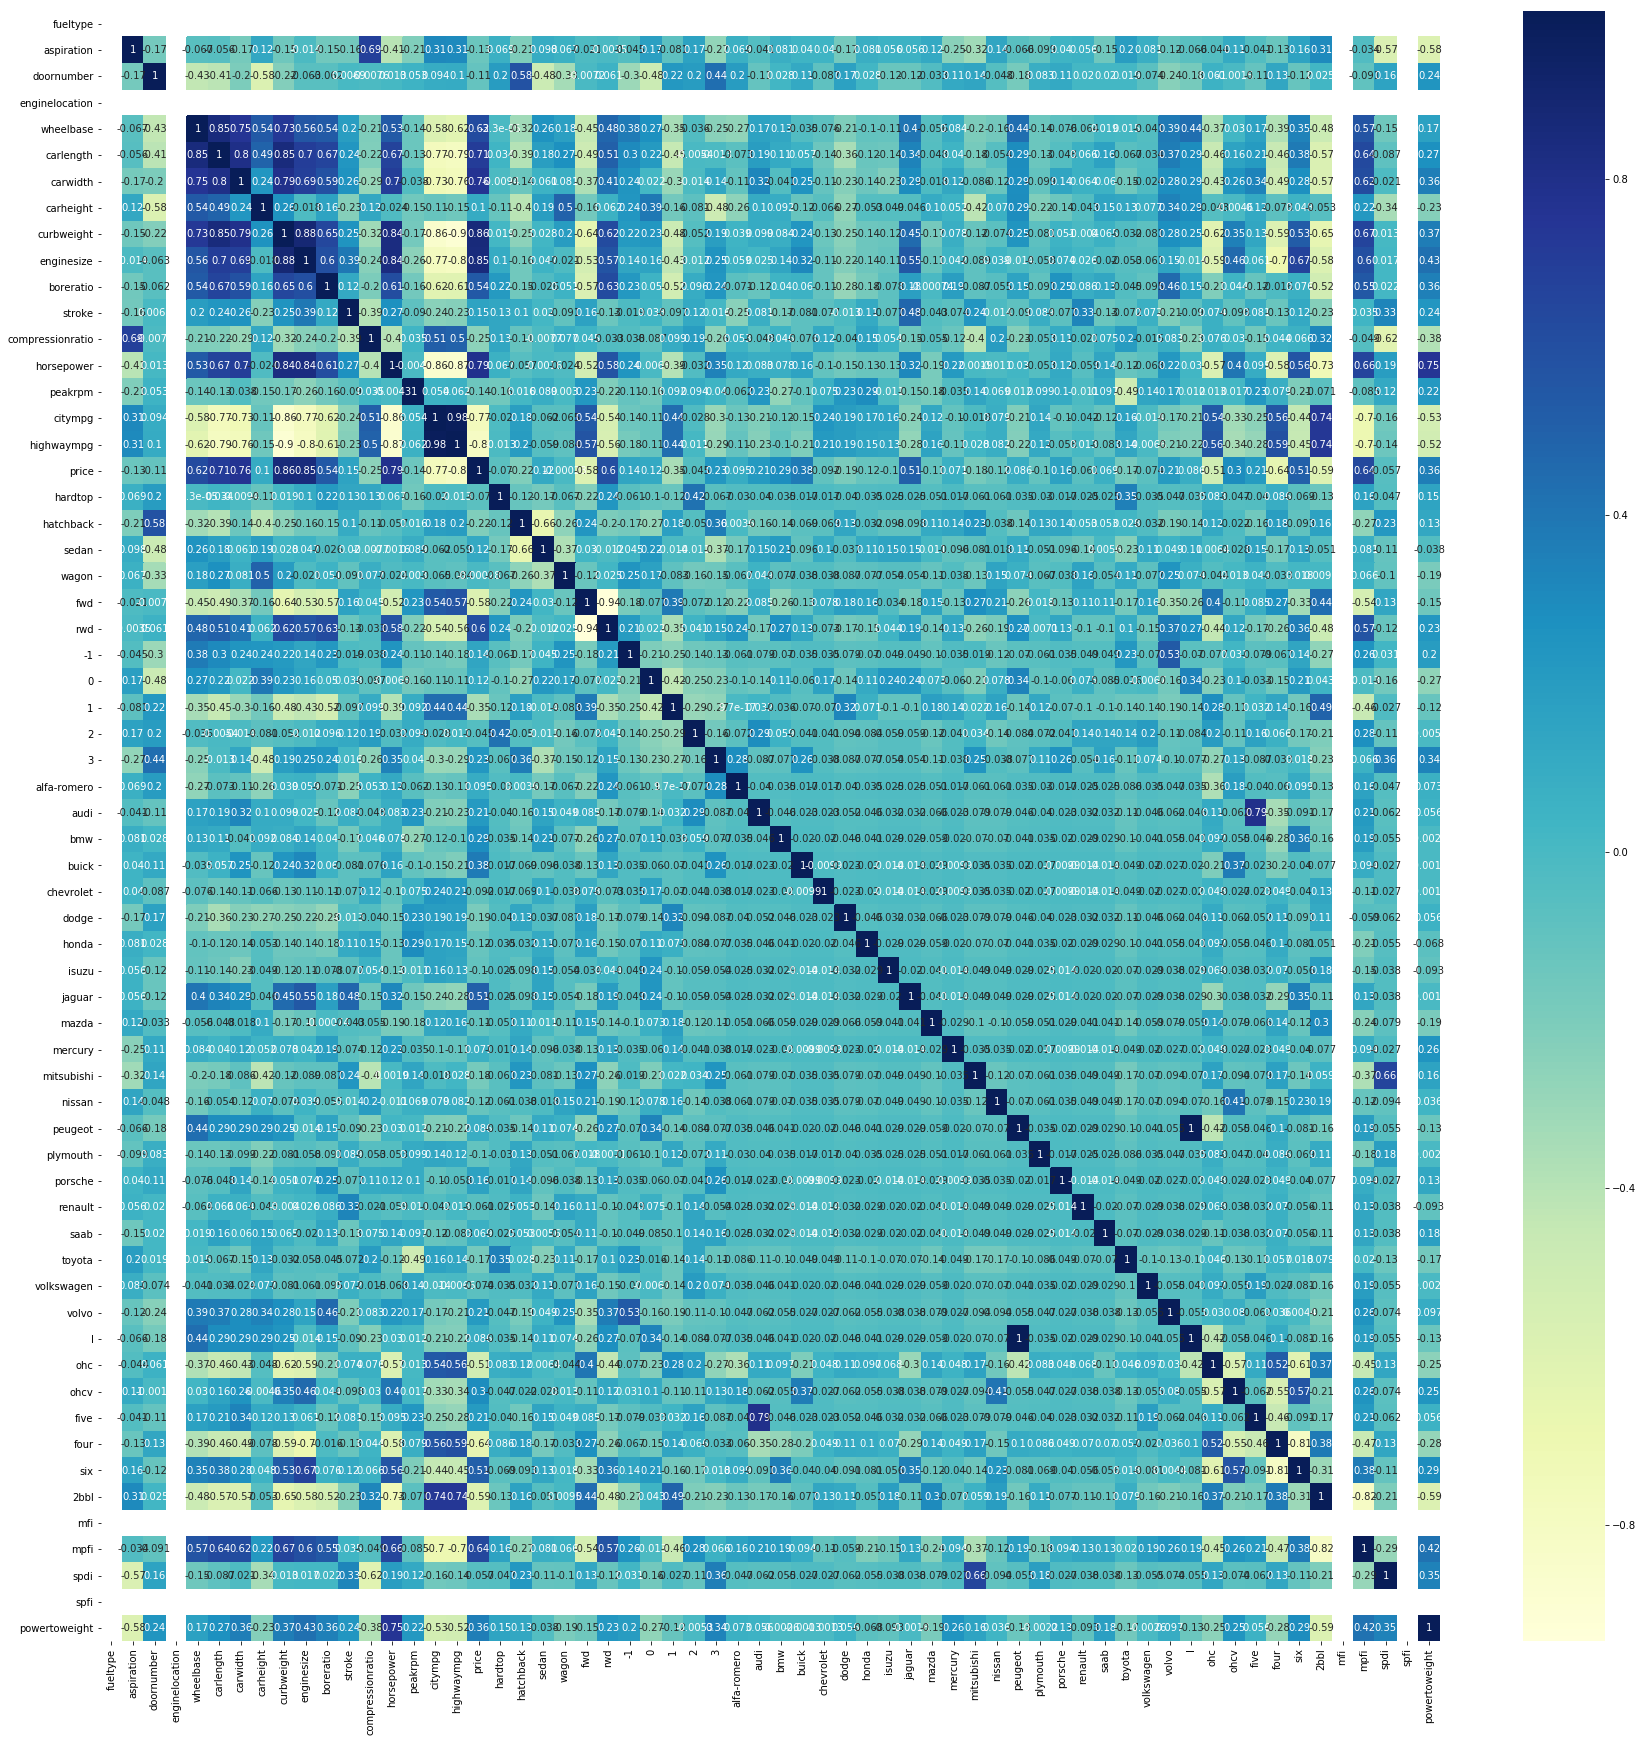

In [290]:
# Find the correlation coefficients to see which variables are highly correlated


plt.figure(figsize = (30, 30))
sns.heatmap(carprice_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

>Price is highly corelated to the curbweight and engine size

> Hence create a scatterplot for them

In [291]:
##Plot  scatterplot  curbweight vs price to see the trend.
sns.scatterplot(x=carprice_train['curbweight'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [292]:
##Plot  scatterplot  enginesize vs price to see the trend.
sns.scatterplot(x=carprice_train['enginesize'], y=carprice['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

>From above plots, 

>linear rise in price as and when the curbweight and the engine size rises. 

>Let create the regression line using curbweight and engine size.

In [293]:
##Divide train data to X and Y train 
y_train = carprice_train.pop('price')
X_train = carprice_train

>We can now build the linear model

In [294]:
import statsmodels.api as sm

#Creating the first model using only curbweigt
X_train_lm = sm.add_constant(X_train[['curbweight']])


lr = sm.OLS(y_train, X_train_lm).fit()

In [295]:
lr.params

const          4638.457239
curbweight    24235.492548
dtype: float64

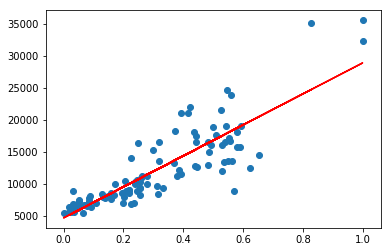

In [296]:
# Plotting graph to see the regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 4638.46 + 24235.49*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [297]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           8.81e-31
Time:                        02:44:58   Log-Likelihood:                -964.95
No. Observations:                 102   AIC:                             1934.
Df Residuals:                     100   BIC:                             1939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4638.4572    548.339      8.459      0.0

>Adding engine size to lr line

In [298]:
X_train_lm = X_train[['curbweight', 'enginesize']]

In [299]:


import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          4361.972799
curbweight    13858.562069
enginesize    13424.896872
dtype: float64

In [300]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           5.68e-33
Time:                        02:45:02   Log-Likelihood:                -956.61
No. Observations:                 102   AIC:                             1919.
Df Residuals:                      99   BIC:                             1927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4361.9728    512.095      8.518      0.0

> We see increase in r_square value from 0.737 0.777

> Adding next value carwidth. 

In [301]:

X_train_lm = X_train[['curbweight', 'enginesize','carwidth']]

In [302]:


import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          3180.307332
curbweight     8993.281004
enginesize    13587.041152
carwidth       6540.634076
dtype: float64

In [303]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.99e-33
Time:                        02:45:05   Log-Likelihood:                -952.70
No. Observations:                 102   AIC:                             1913.
Df Residuals:                      98   BIC:                             1924.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3180.3073    651.267      4.883      0.0

>Again we see increase in r_square value

In [304]:
#Display all columns

carprice.columns

Index([        'fueltype',       'aspiration',       'doornumber',
         'enginelocation',        'wheelbase',        'carlength',
               'carwidth',        'carheight',       'curbweight',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'fwd',              'rwd',
                       -1,                  0,                  1,
                        2,                  3,      'alfa-romero',
                   'audi',              'bmw',            'buick',
              'chevrolet',            'dodge',            'honda',
                  'isuzu',           'jaguar',            'mazda',
                'mercury',       'mitsubishi',           'nissan',
                'peugeot',         'plymouth',          'porsc

In [305]:
#Building first model using all the values

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

fueltype            9.342325e-11
aspiration         -2.534653e+03
doornumber         -9.736808e+02
enginelocation      1.047386e+04
wheelbase           9.146382e+03
carlength          -6.415673e+03
carwidth            2.639806e+03
carheight          -2.606702e+03
curbweight          9.834508e+03
enginesize          4.684703e+02
boreratio          -1.151761e+03
stroke              4.001615e+03
compressionratio   -1.427505e+02
horsepower          2.069061e+02
peakrpm             2.351172e+03
citympg             1.484536e+03
highwaympg         -2.458487e+02
hardtop            -6.458881e+03
hatchback          -6.085985e+03
sedan              -6.031382e+03
wagon              -6.447878e+03
fwd                -6.340056e+02
rwd                 1.968307e+03
-1                  1.105906e+03
0                   6.200200e+02
1                  -2.110668e-01
2                  -8.543658e+02
3                   1.683268e+03
alfa-romero         2.300551e+03
audi                5.744163e+03
          

In [306]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     31.05
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.74e-23
Time:                        02:45:09   Log-Likelihood:                -847.43
No. Observations:                 102   AIC:                             1807.
Df Residuals:                      46   BIC:                             1954.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype          9.342e-11   4.25e-10  

>Few variables are present where their p-VALUE > 0.05. Hence we could drop those.

>Before drropping we should check the vif value as well.

In [307]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [308]:
# Creating DF with all features and corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
41,peugeot,inf
49,l,inf
54,six,inf
52,five,inf
53,four,inf
31,buick,inf
9,enginesize,875.190000
10,boreratio,295.630000
16,highwaympg,126.960000
15,citympg,106.310000


> Few factors have high p-value

> Those factors are peugeot,enginesize,l,boreratio,compressionratio,five,honda,powertoweight,highwaympg

In [309]:
# We need to drop the highly corelated values 
# We also drop insgnificant values
X_train.drop([X_train.columns[23],X_train.columns[24],X_train.columns[25],X_train.columns[26],X_train.columns[27]],axis=1,inplace=True)

In [310]:
# We need to drop the highly corelated values 
# We also drop insgnificant values
X_train.drop(['mpfi','curbweight','carlength','sedan','rwd','2bbl','wheelbase','hatchback','fwd','citympg','volvo','wagon','ohc','stroke','carheight'],1,inplace=True)
X=X_train

In [311]:
# Build the 2nd fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [312]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     40.05
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           9.71e-33
Time:                        02:45:18   Log-Likelihood:                -874.92
No. Observations:                 102   AIC:                             1822.
Df Residuals:                      66   BIC:                             1916.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype          9.629e-10   7.53e-10  

In [313]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,six,inf
35,four,inf
34,five,inf
32,l,inf
25,peugeot,inf
15,buick,inf
5,enginesize,122.680000
8,horsepower,40.790000
6,boreratio,35.600000
10,highwaympg,17.160000


In [314]:
## We need to drop the highly corelated values 
# We also drop insgnificant values
X_train.drop(['six','four','five','l','peugeot','enginesize','boreratio','highwaympg','toyota','spdi','mitsubishi','audi','aspiration','peakrpm','ohcv','nissan','saab','volkswagen','mazda','doornumber','alfa-romero','dodge','hardtop'],1,inplace=True)
X=X_train

In [315]:
# Build the 3rd fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [316]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     67.14
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           2.06e-40
Time:                        02:45:23   Log-Likelihood:                -907.22
No. Observations:                 102   AIC:                             1844.
Df Residuals:                      87   BIC:                             1884.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype                  0          0  

In [317]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,37.82
4,horsepower,5.87
17,powertoweight,3.53
2,carwidth,2.59
10,jaguar,1.38
3,compressionratio,1.32
6,buick,1.13
9,isuzu,1.08
11,mercury,1.08
5,bmw,1.07


In [318]:
## We need to drop the highly corelated values 
# We also drop insgnificant values
X_train.drop(['chevrolet','fueltype','mfi','spfi','mercury','renault','plymouth','isuzu'],1,inplace=True)
X=X_train

In [319]:
# Build the 4th fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [320]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           3.55e-44
Time:                        02:45:40   Log-Likelihood:                -910.22
No. Observations:                 102   AIC:                             1840.
Df Residuals:                      92   BIC:                             1867.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginelocation    5795.1075   1134.444  

In [321]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,35.87
3,horsepower,5.74
9,powertoweight,3.41
1,carwidth,2.41
7,jaguar,1.37
2,compressionratio,1.30
5,buick,1.12
4,bmw,1.07
8,porsche,1.07
6,honda,1.04


In [322]:
# We need to drop the highly corelated values 
# We also drop insgnificant values

X_train.drop(['compressionratio','honda','powertoweight'],1,inplace=True)
X=X_train

In [323]:
# Build the fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [324]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     135.2
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           2.87e-44
Time:                        02:45:44   Log-Likelihood:                -918.08
No. Observations:                 102   AIC:                             1850.
Df Residuals:                      95   BIC:                             1869.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation  4000.1545    490.339      8.

In [325]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 199 to 8
Data columns (total 7 columns):
enginelocation    102 non-null int64
carwidth          102 non-null float64
horsepower        102 non-null float64
bmw               102 non-null uint8
buick             102 non-null uint8
jaguar            102 non-null uint8
porsche           102 non-null uint8
dtypes: float64(2), int64(1), uint8(4)
memory usage: 3.6 KB


In [326]:
#Remaining analyses
y_train_price = lr_5.predict(X_train_lm)

Text(0.5,0,'Errors')

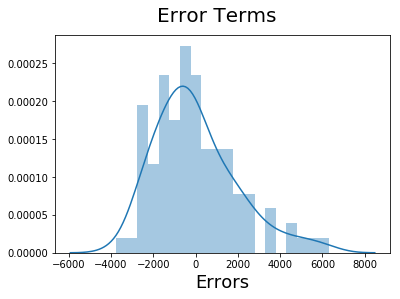

In [327]:
# Histogram fir the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

> Now we use the Final Model to make the predictions

In [328]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','powertoweight']
carprice_test[num_vars] = scaler.fit_transform(carprice_test[num_vars])

In [329]:
carprice_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,ohcv,five,four,six,2bbl,mfi,mpfi,spdi,spfi,powertoweight
count,44.0,44.000000,44.000000,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.0,0.840909,0.454545,1.0,0.236566,0.364074,0.258979,0.398965,0.313079,0.210859,...,0.045455,0.045455,0.863636,0.068182,0.409091,0.022727,0.454545,0.045455,0.022727,0.325758
std,0.0,0.369989,0.503686,0.0,0.220995,0.251392,0.241888,0.242134,0.241960,0.221302,...,0.210707,0.210707,0.347142,0.254972,0.497350,0.150756,0.503686,0.210707,0.150756,0.273636
min,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,0.000000,1.0,0.062222,0.185760,0.074074,0.227723,0.112406,0.053819,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.000000,0.000000,1.0,0.166667,0.370450,0.197531,0.425743,0.283226,0.138889,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
75%,0.0,1.000000,1.000000,1.0,0.333333,0.508565,0.358025,0.586634,0.506565,0.279514,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333
max,0.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [330]:
y_test = carprice_test.pop('price')
X_test = carprice_test

In [331]:

X_test_m4 = sm.add_constant(X_test)

In [332]:
# Create dataframe X_test_m4  by dropping variables from X_test_m4

X_test_m4.drop([X_test_m4.columns[23],X_test_m4.columns[24],X_test_m4.columns[25],X_test_m4.columns[26],X_test_m4.columns[27]],axis=1,inplace=True)

In [333]:
X_test_m4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 98 to 137
Data columns (total 56 columns):
fueltype            44 non-null int64
aspiration          44 non-null int64
doornumber          44 non-null int64
enginelocation      44 non-null int64
wheelbase           44 non-null float64
carlength           44 non-null float64
carwidth            44 non-null float64
carheight           44 non-null float64
curbweight          44 non-null float64
enginesize          44 non-null float64
boreratio           44 non-null float64
stroke              44 non-null float64
compressionratio    44 non-null float64
horsepower          44 non-null float64
peakrpm             44 non-null float64
citympg             44 non-null float64
highwaympg          44 non-null float64
hardtop             44 non-null uint8
hatchback           44 non-null uint8
sedan               44 non-null uint8
wagon               44 non-null uint8
fwd                 44 non-null uint8
rwd                 44 non-null u

In [334]:
X_test_m4 = X_test_m4.drop(['fueltype','aspiration','doornumber','wheelbase','carlength','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg','hardtop','hatchback','sedan','wagon','fwd','rwd','alfa-romero','audi','chevrolet','dodge','honda','isuzu','mazda','mercury','mitsubishi','nissan','peugeot','plymouth','renault','saab','toyota','volkswagen','volvo','l','ohc','ohcv','five','four','six','2bbl','mfi','mpfi','spdi','spfi','powertoweight'],axis=1)

In [335]:
y_pred_m4 = lr_5.predict(X_test_m4)

>Model Evaluation

Text(0,0.5,'y_pred')

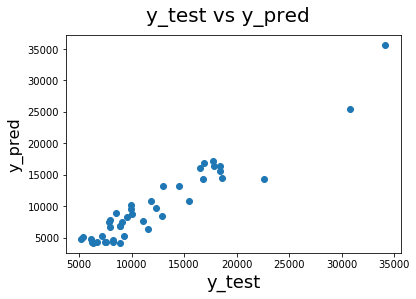

In [336]:
# Plot y_test and y_pred to see how the data is distributed

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

>From the above plot of y_test vs y_pred, 

> There is little skew towards high end present but values are very close.

>We could fix the skew present by adding few more new derived values.




In [337]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7903538421407076

# Conclusion

* Finally we arrive at a point where we can clearly state that the following values are significant,

    1. enginelocation
    2. carwidth
    3. horsepower
    4. bmw
    5. buick
    6. porsche
    7. jaguar
    
* It can be concluded that the car price is dependent more on the car manufacturer rather the features of the car. To back this statement we can have a look at the 7 significant values mentioned above to notice that amongst the 7 values 4 of them are the manufacturers of the car.
   
* To answer the question of the quality of the model, the R2 score is ~80%. And hence, this is a good model. 

* However we can improve the model by getting few more values or by going with a non linear approach

    